In [2]:
import pandas as pd
import random
import re       # regular expression library
from sklearn.feature_extraction.text import CountVectorizer


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
csv_file = 'money.csv'                              # the input csv file
topic_file = 'topics_'+csv_file
data_path = 'data/'+csv_file
topic_path = 'topics/'+topic_file
df = pd.read_csv(data_path)
df.head()


,text
0,"Let’s say I had an apple, and you had an orang..."
1,an apple.
2,"We could trade, and both of us would end up ha..."
3,"But now let’s say I had an apple tree, and you..."
4,"the apple tree were ready, but the oranges wou..."


In [4]:
# Remove punctuation
df['processed_text'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['processed_text'] = \
df['processed_text'].map(lambda x: x.lower())

# Print out the first rows of papers
df.head()


,text,processed_text
0,"Let’s say I had an apple, and you had an orang...",let’s say i had an apple and you had an orange...
1,an apple.,an apple
2,"We could trade, and both of us would end up ha...",we could trade and both of us would end up hap...
3,"But now let’s say I had an apple tree, and you...",but now let’s say i had an apple tree and you ...
4,"the apple tree were ready, but the oranges wou...",the apple tree were ready but the oranges woul...


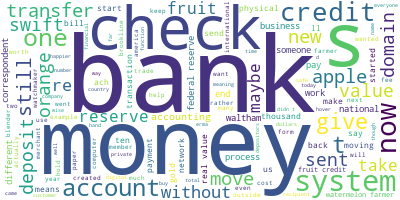

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['processed_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()


In [10]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.processed_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amittaijoel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2)]


In [15]:
from pprint import pprint

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.030*"bank" + 0.026*"money" + 0.017*"banks" + 0.010*"system" + '
  '0.006*"checks" + 0.006*"accounting" + 0.006*"federal" + 0.006*"reserve" + '
  '0.006*"check" + 0.006*"moving"'),
 (1,
  '0.025*"money" + 0.023*"bank" + 0.012*"credits" + 0.011*"one" + '
  '0.009*"account" + 0.009*"fruit" + 0.007*"value" + 0.007*"check" + '
  '0.007*"maybe" + 0.007*"system"'),
 (2,
  '0.015*"money" + 0.014*"give" + 0.010*"system" + 0.010*"bank" + '
  '0.009*"still" + 0.009*"orange" + 0.009*"apple" + 0.006*"value" + '
  '0.006*"reserve" + 0.006*"checks"')]


## Analyzing Gensim Model Results

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared
